In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture

In [2]:
X_scaled = pd.read_csv("../datasets/preprocessed/Preprocessed_data_1.csv")
X_scaled.head()

,Unnamed: 0,Quantity,UnitPrice,Hours,DayOfweek,Month
0,0,0.037910,0.022415,-2.11206,-0.24284,1.270505
1,1,0.037910,0.464846,-2.11206,-0.24284,1.270505
2,2,0.366158,0.127756,-2.11206,-0.24284,1.270505
3,3,0.037910,0.464846,-2.11206,-0.24284,1.270505
4,4,0.037910,0.464846,-2.11206,-0.24284,1.270505


In [3]:
X_scaled.drop("Unnamed: 0",axis=1)

,Quantity,UnitPrice,Hours,DayOfweek,Month
0,0.037910,0.022415,-2.112060,-0.242840,1.270505
1,0.037910,0.464846,-2.112060,-0.242840,1.270505
2,0.366158,0.127756,-2.112060,-0.242840,1.270505
3,0.037910,0.464846,-2.112060,-0.242840,1.270505
4,0.037910,0.464846,-2.112060,-0.242840,1.270505
...,...,...,...,...,...
401337,1.022653,-0.872981,-0.473338,0.827842,1.270505
401338,0.037910,-0.214602,-0.473338,0.827842,1.270505
401339,-0.290338,0.865141,-0.473338,0.827842,1.270505
401340,-0.290338,0.865141,-0.473338,0.827842,1.270505


In [5]:
numpy_X = X_scaled.to_numpy()
print(numpy_X)

[[ 0.00000000e+00  3.79101637e-02  2.24152309e-02 -2.11205962e+00
  -2.42840436e-01  1.27050465e+00]
 [ 1.00000000e+00  3.79101637e-02  4.64846474e-01 -2.11205962e+00
  -2.42840436e-01  1.27050465e+00]
 [ 2.00000000e+00  3.66157940e-01  1.27756003e-01 -2.11205962e+00
  -2.42840436e-01  1.27050465e+00]
 ...
 [ 4.01339000e+05 -2.90337612e-01  8.65141409e-01 -4.73338044e-01
   8.27841841e-01  1.27050465e+00]
 [ 4.01340000e+05 -2.90337612e-01  8.65141409e-01 -4.73338044e-01
   8.27841841e-01  1.27050465e+00]
 [ 4.01341000e+05 -4.54461500e-01  1.28650450e+00 -4.73338044e-01
   8.27841841e-01  1.27050465e+00]]


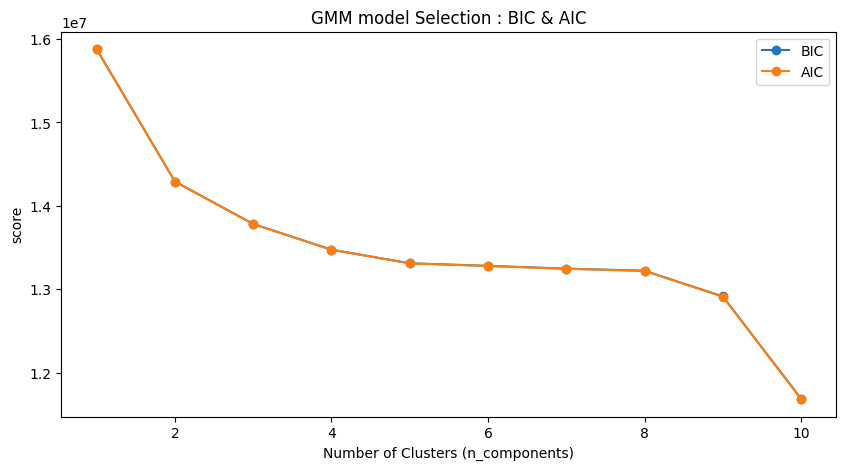

In [7]:
n_components = range(1, 11)
models = [GaussianMixture(n, covariance_type='full', random_state=42).fit(numpy_X)
          for n in n_components]

plt.figure(figsize=(10, 5))
plt.plot(n_components, [m.bic(X_scal) for m in models], label='BIC', marker='o')
plt.plot(n_components, [m.aic(X_scaled) for m in models], label='AIC', marker='o')
plt.legend(loc='best')
plt.xlabel('Number of Clusters (n_components)')
plt.ylabel('Score')
plt.title('GMM Model Selection: BIC & AIC')
plt.show()